In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob

## Data Processesing

In [3]:
path = 'data/labled_/data*.csv'

frames = []

# Process each file in chunks
for fname in glob.glob(path):
    chunks = pd.read_csv(fname, chunksize=500000)  
    for chunk in chunks:
        frames.append(chunk)

all_data = pd.concat(frames)

print("Data successfully loaded in chunks.")



/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_5432/610173434.py:8: DtypeWarning: Columns (32,34,36,38,42,44,46,48,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:


Data successfully loaded in chunks.


In [4]:
all_data.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2012,0000024224,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,1199,2904.0,6.30,88800.0,80.730003,634.0,967.0,0
1,2012,0000002285,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,Quality edit failure only,6.0,55,3809.0,10.21,80000.0,98.800003,1354.0,2035.0,0
2,2012,0000497404,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,69209,7234.0,3.44,70200.0,117.870003,2502.0,3236.0,0
3,2012,0000504713,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,20433,3782.0,8.91,88800.0,96.820000,776.0,1419.0,2
4,2012,0000476810,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,31007,2211.0,21.35,88800.0,104.690002,412.0,99.0,0


In [5]:
print(all_data.columns)

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

In [6]:
def map_loan_approval(action):
    if action == 1:
        return 1
    elif action in [2, 4, 5]:
        return 2
    elif action == 3:
        return 0
    else:
        return None  # All values that are dealing w/ preapproval and other inconclusive outcomes go here

all_data['loan_approval'] = all_data['action_taken'].apply(map_loan_approval)

In [7]:
all_data['action_taken_name'].value_counts()

action_taken_name
Loan originated                                        288584
Loan purchased by the institution                      105404
Application denied by financial institution             54950
Application withdrawn by applicant                      37482
File closed for incompleteness                          17366
Application approved but not accepted                   12409
Preapproval request denied by financial institution         8
Preapproval request approved but not accepted               2
Name: count, dtype: int64

In [ ]:
# Filter the dataset to include only rows where 'loan_purpose' equals 1 (Home Purchase)

all_data = all_data[all_data['loan_purpose'] == 1]
print("Filtered dataset to include only Home Purchase loans (loan_purpose = 1).")
print(all_data.shape)


Filtered dataset to include only Home Purchase loans (loan_purpose = 1).
(109698, 79)


## Race and Ethnicity Breakdown

In [9]:
all_data['applicant_ethnicity_name'].value_counts()

applicant_ethnicity_name
Not Hispanic or Latino                                                               80822
Not applicable                                                                       14622
Information not provided by applicant in mail, Internet, or telephone application     9479
Hispanic or Latino                                                                    4775
Name: count, dtype: int64

In [10]:
all_data['applicant_race_name_1'].value_counts()

applicant_race_name_1
White                                                                                75229
Not applicable                                                                       14613
Information not provided by applicant in mail, Internet, or telephone application     9619
Asian                                                                                 6642
Black or African American                                                             3215
American Indian or Alaska Native                                                       214
Native Hawaiian or Other Pacific Islander                                              166
Name: count, dtype: int64

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_5432/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


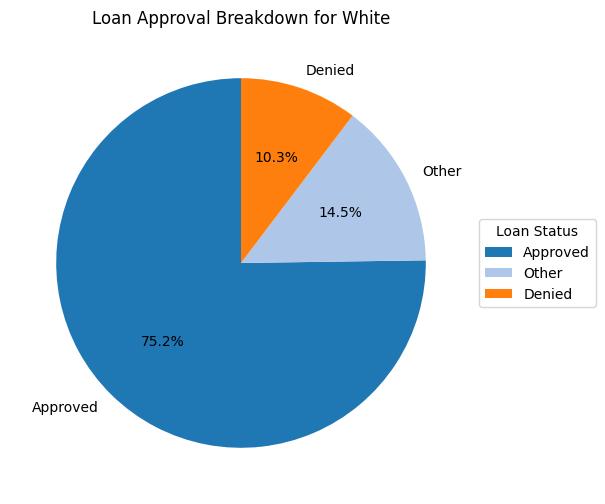

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_5432/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


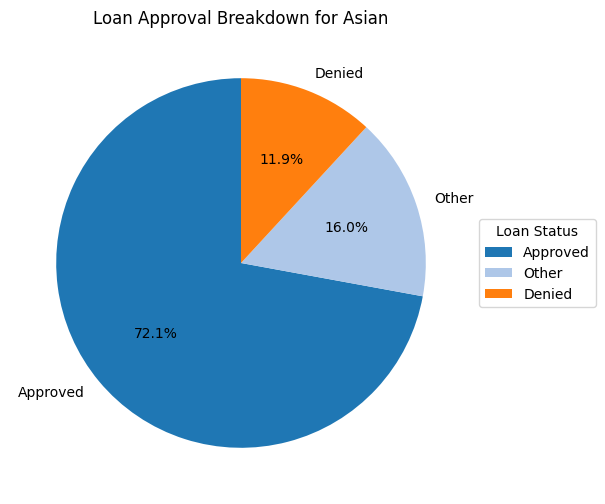

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_5432/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


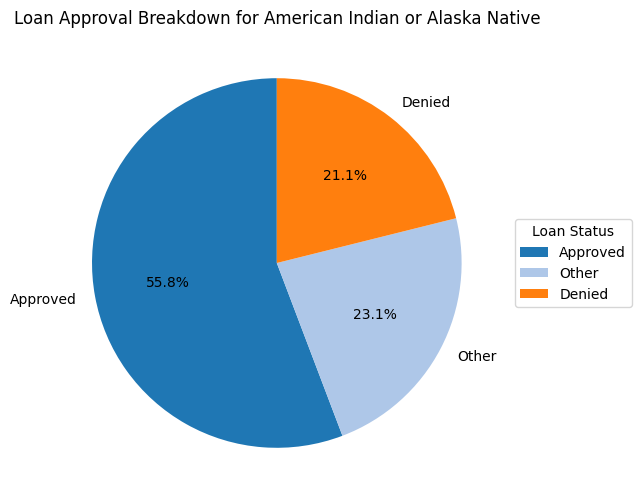

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_5432/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


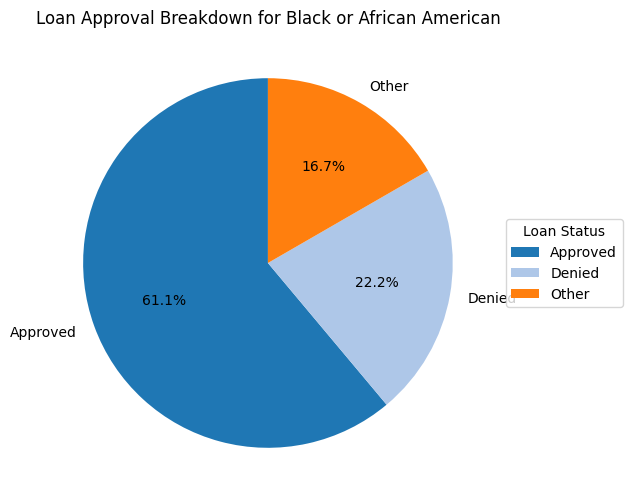

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_5432/4105608320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)


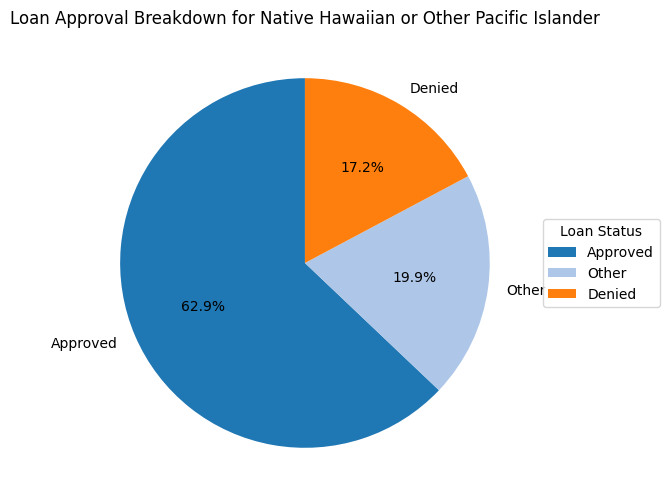

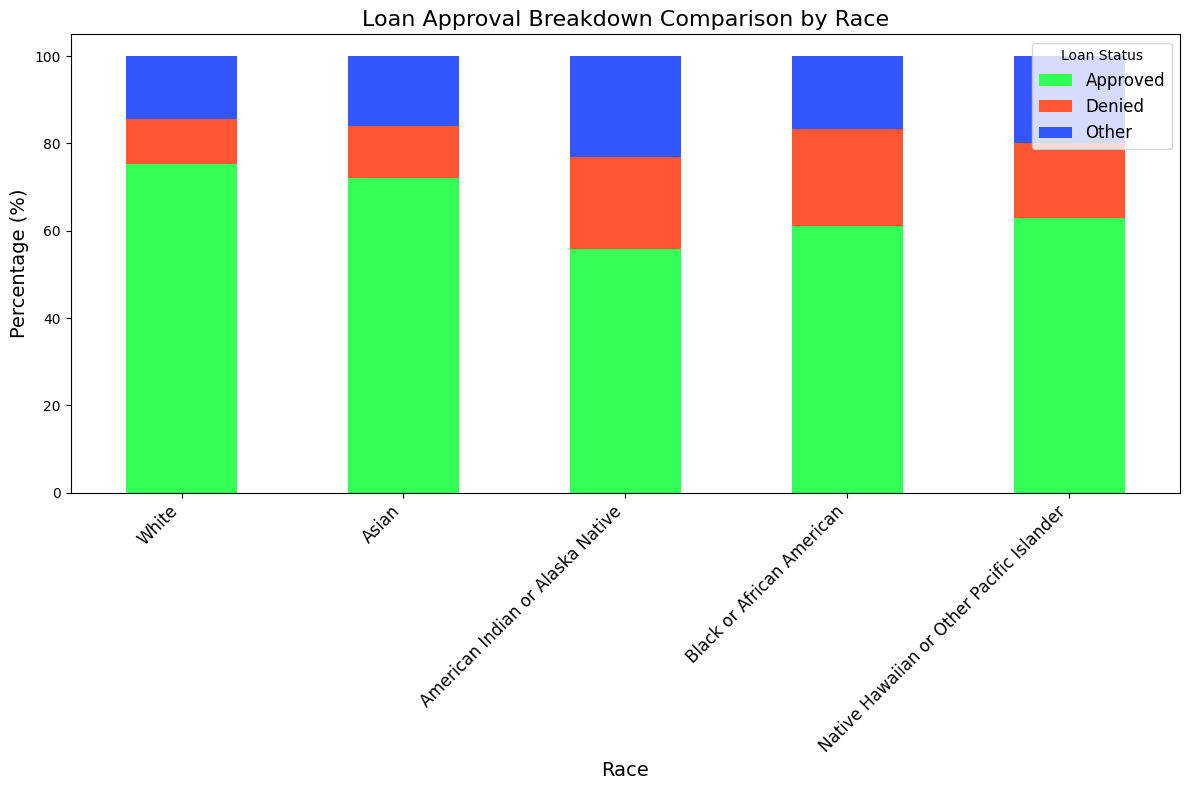

In [11]:
# Breakdown by Race
approval_labels = {0: 'Denied', 1: 'Approved', 2: 'Other'}

# Dictionary to store all races and their approval counts
race_approval_dict = {}

for race in all_data['applicant_race_name_1'].unique():
    if race in ['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable']: 
        continue
    race_data = all_data[all_data['applicant_race_name_1'] == race]
    race_data['loan_approval_label'] = race_data['loan_approval'].map(approval_labels)
    approval_counts = race_data['loan_approval_label'].value_counts(normalize=True) * 100

    race_approval_dict[race] = approval_counts

    # Generate pie chart for the current race
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        approval_counts, 
        labels=approval_counts.index,  # Use the mapped labels for display
        autopct='%1.1f%%', 
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Loan Approval Breakdown for {race}")
    plt.legend(wedges, approval_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

race_approval_df = pd.DataFrame(race_approval_dict).fillna(0).transpose()

# Plot a bar chart comparing all races
approval_colors = ["#33FF57", "#FF5733", "#3357FF"] 
race_approval_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=approval_colors)

plt.title("Loan Approval Breakdown Comparison by Race", fontsize=16)
plt.xlabel("Race", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Loan Status", fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()



/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_5432/342968076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


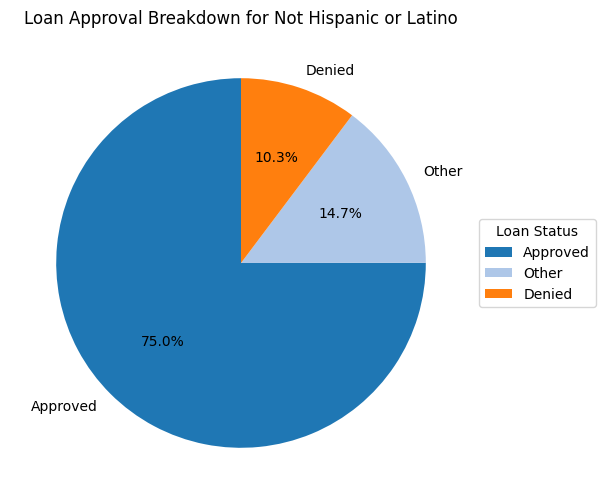

/var/folders/4l/122hzjgj6dj2ghrnj8z81_mm0000gn/T/ipykernel_5432/342968076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)


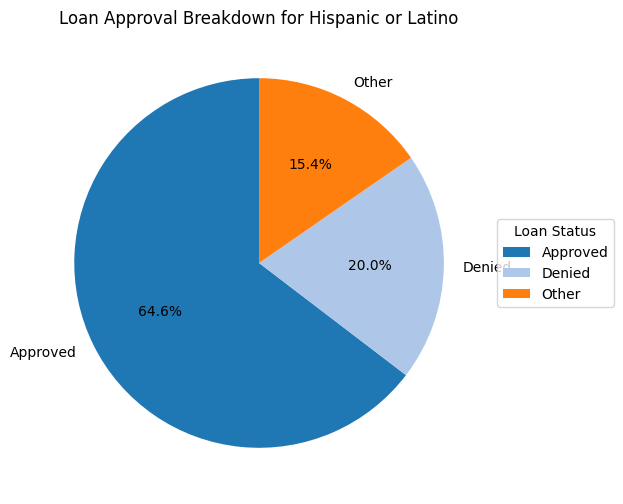

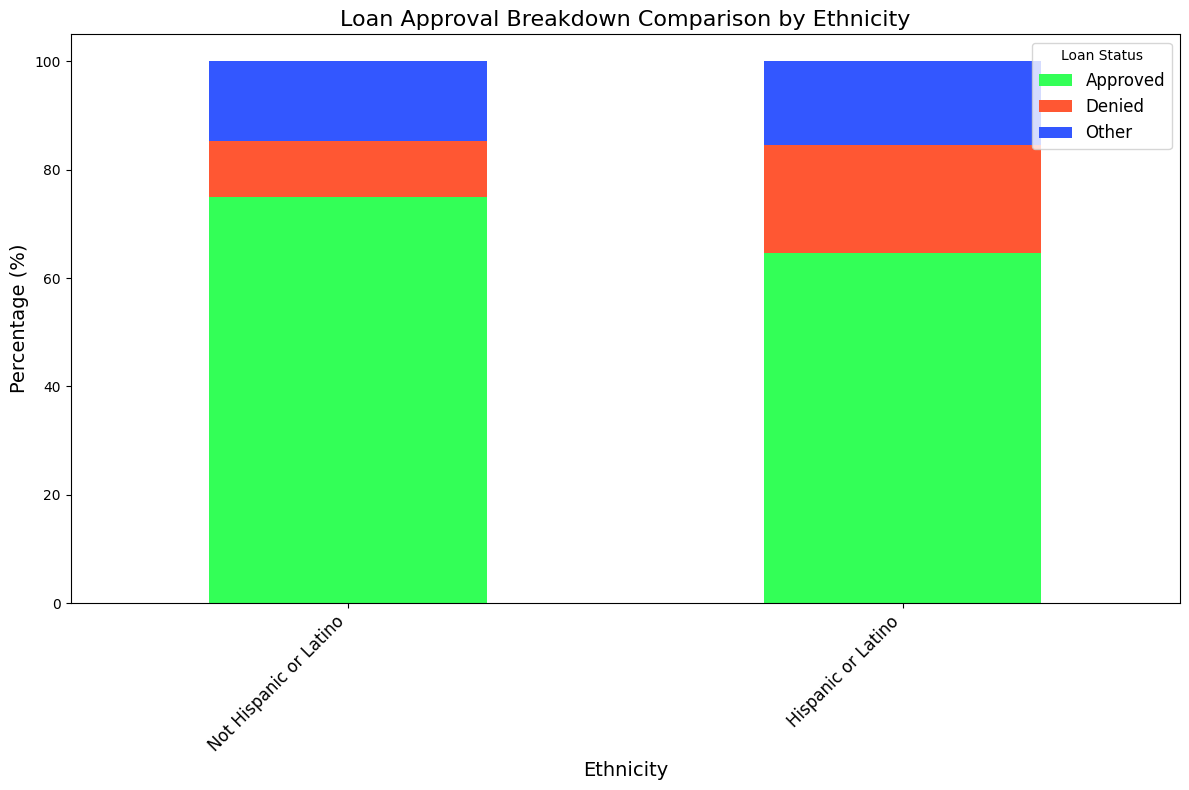

In [12]:
# Ethnicity Breakdown
approval_labels = {0: 'Denied', 1: 'Approved', 2: 'Other'}

# Dictionary to store all ethnicities and their approval counts
ethnicity_approval_dict = {}

for eth in all_data['applicant_ethnicity_name'].unique():
    if eth in ['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable']:
        continue
    eth_data = all_data[all_data['applicant_ethnicity_name'] == eth]
    eth_data['loan_approval_label'] = eth_data['loan_approval'].map(approval_labels)
    approval_counts = eth_data['loan_approval_label'].value_counts(normalize=True) * 100

    # Add approval counts to the dictionary
    ethnicity_approval_dict[eth] = approval_counts

    # Generate pie chart for the current ethnicity
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        approval_counts,
        labels=approval_counts.index,  # Use the mapped labels for display
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(f"Loan Approval Breakdown for {eth}")
    plt.legend(wedges, approval_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

ethnicity_approval_df = pd.DataFrame(ethnicity_approval_dict).fillna(0).transpose()

# Plot a bar chart comparing all ethnicities
approval_colors = ["#33FF57", "#FF5733", "#3357FF"] 
ethnicity_approval_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=approval_colors)

plt.title("Loan Approval Breakdown Comparison by Ethnicity", fontsize=16)
plt.xlabel("Ethnicity", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Loan Status", fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()


## Co-Variance Breakdown

In [19]:
# Updated code to calculate and display high covariance without ace_tools

if 'loan_approval' in all_data.columns:

    # Select only numerical columns (not sure if we need to do some preprocessing and change data into)
    numerical_cols = all_data.select_dtypes(include=['float64', 'int64']).columns
    covariances = {}

    for col in numerical_cols:
        if col != 'loan_approval':  
            cov = all_data['loan_approval'].cov(all_data[col])
            covariances[col] = cov

    sorted_covariances = sorted(covariances.items(), key=lambda x: abs(x[1]), reverse=True)

    high_cov_df = pd.DataFrame(sorted_covariances, columns=['Column', 'Covariance'])
    high_cov_df = high_cov_df[(high_cov_df['Covariance'] != 0) & (~high_cov_df['Covariance'].isna())]
  

    print("High Covariance with Loan Approval:")
    print(high_cov_df)


High Covariance with Loan Approval:
                            Column  Covariance
3         hud_median_family_income  296.513236
4              census_tract_number  -34.891227
5                       population   14.061431
6                 loan_amount_000s    9.403534
7            applicant_income_000s    3.738338
8   number_of_owner_occupied_units    2.483217
9    number_of_1_to_4_family_units   -2.074028
10                           msamd    2.005498
11           tract_to_msamd_income    0.725445
12                    action_taken    0.235430
13                     county_code   -0.201031
14                  purchaser_type   -0.158055
15             minority_population    0.064502
16                      state_code   -0.038185
17             co_applicant_race_3   -0.036050
18                applicant_race_5   -0.035154
19             co_applicant_race_4   -0.034944
20             co_applicant_race_5    0.026800
21                applicant_race_3   -0.019063
22                   pro